<a href="https://colab.research.google.com/github/eidergiraldo85/App-pedidos-backend/blob/main/Mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tasa de mortalidad**
La Tasa de mortalidad se define como la proporción de muertes que se producen en un área concreta (país, comunidad, provincia, municipio, etc) respecto a su población total a lo largo de un año. Normalmente se expresa en tanto por mil (‰).

Más allá del resultado que arroje el porcentaje, es importante la información que nos ofrece la comparación de la tasa de mortalidad de una zona con la del resto, así como las diferencias que se producen según el **sexo**, **edad** de sus habitantes u **otro tipo de condicionantes**.

Para calcular la **tasa de mortalidad** tenemos que dividir el **número de muertes** en un periodo entre la **población media en dicho periodo** y multiplicando el resultado por mil.

Para calcular la tasa de mortalidad solo tenemos que aplicar la siguiente fórmula:

![](https://datosmacro.expansion.com/sites/default/files/varios/diccionario/formula_tasa-mortalidad_datosmacro.png)

En general se considera que un área tiene una tasa alta de mortalidad si esta está por encima del 30 ‰. Una tasa moderada de mortalidad se sitúa entre el 15 y el 30 ‰ y una tasa baja por debajo del 15 ‰.

**Existe una correlación inversa entre la esperanza de vida al nacer y la tasa de mortalidad**, ya que cuanto mayor sea la esperanza de vida al nacer en una población concreta, menor será su tasa de mortalidad.

Además de la tasa de mortalidad por sexo y edad, también se estudia la tasa de mortalidad relacionada con diferentes **enfermedades** o **situaciones**.

En el siguiente enlace te mostramos ranking de tasa de mortalidad en el mundo por países.

Fuente: [datosmacro](https://datosmacro.com)

In [ ]:
# Cargamos los datos 
url_Mortalidad = "https://raw.githubusercontent.com/juanpaat/DS4A-Medellin/main/WHOMortalityDatabase_Trends_years_many_countries_by_age_sex-All%20Causes_8th%20agosto%202022%2020_22.csv"
Mortalidad = pd.read_csv(url_Mortalidad,skiprows=[0,1,2,3,4,5] , header=0 ,index_col=False)

In [ ]:
# Llamamos la función .shape para conocer el tamaño de las filas y las columnas 
Mortalidad.shape

(300258, 12)

In [ ]:
# Utilizamos la función .info() para conocer mas detalles de nuestro dataframe como tipo de datos, cantidad de nulos, etc.
Mortalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300258 entries, 0 to 300257
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Region Code                                                  300258 non-null  object 
 1   Region Name                                                  300258 non-null  object 
 2   Country Code                                                 300258 non-null  object 
 3   Country Name                                                 300258 non-null  object 
 4   Year                                                         300258 non-null  int64  
 5   Sex                                                          300258 non-null  object 
 6   Age group code                                               300258 non-null  object 
 7   Age Group                                                    3002

In [ ]:
# Definimos trabajar con los años del 2000 en adelante 
Mortalidad = Mortalidad[Mortalidad['Year']>=2000]

In [ ]:
# Visualizamos la columna country 
Mortalidad['Country Name']

693                        Albania
694                        Albania
695                        Albania
696                        Albania
697                        Albania
                    ...           
300253    United States of America
300254    United States of America
300255    United States of America
300256    United States of America
300257    United States of America
Name: Country Name, Length: 125895, dtype: object

In [ ]:
# Visualizamos las columnas del dataframe mortalidad 
Mortalidad.columns = ['Region_Code', 'Region_Name', 'Country_Code', 'Country_Name', 'Year',
       'Sex', 'Age_group_code', 'Age_Group', 'Number_of_deaths',
       'Percentage_of_cause-specific_deaths_out_of_total_deaths',
       'Age-standardized_death_rate_per_100000_standard_population',
       'Death_rate_per_100000population']

In [ ]:
# Aplicamos la funcion .value_counts() para conocer el recuento de valores unicos para la columna 'Percentage_of_cause-specific_deaths_out_of_total_deaths'
Mortalidad['Percentage_of_cause-specific_deaths_out_of_total_deaths'].value_counts()

100.0    125895
Name: Percentage_of_cause-specific_deaths_out_of_total_deaths, dtype: int64

In [ ]:
# Empleamos la funcion .drop para eliminar las columnas que no son de interés
Mortalidad.drop( columns=['Region_Code','Country_Code','Age_group_code','Percentage_of_cause-specific_deaths_out_of_total_deaths'], inplace=True)

In [ ]:
# Visualizamos el dataframe 
Mortalidad.head(30)

,Region_Name,Country_Name,Year,Sex,Age_Group,Number_of_deaths,Age-standardized_death_rate_per_100000_standard_population,Death_rate_per_100000population
693,Europe,Albania,2000,All,[All],16411.0,697.153727,527.007065
694,Europe,Albania,2000,All,[0],582.0,NaN,1030.088496
695,Europe,Albania,2000,All,[1-4],343.0,NaN,131.367292
696,Europe,Albania,2000,All,[5-9],169.0,NaN,46.441330
697,Europe,Albania,2000,All,[10-14],118.0,NaN,35.150432
698,Europe,Albania,2000,All,[15-19],182.0,NaN,66.911765
699,Europe,Albania,2000,All,[20-24],249.0,NaN,107.373868
700,Europe,Albania,2000,All,[25-29],253.0,NaN,111.111111
701,Europe,Albania,2000,All,[30-34],248.0,NaN,99.160336
702,Europe,Albania,2000,All,[35-39],296.0,NaN,125.530110


In [ ]:
# Transformamos las variables a categoricas 
Mortalidad["Region_Name"].astype('category')
Mortalidad["Country_Name"].astype('category')
Mortalidad["Year"].astype('category')
Mortalidad["Sex"].astype('category')
Mortalidad["Age_Group"].astype('category')
#Mortalidad["Number of deaths"].astype('int64')
#Mortalidad["Age-standardized death rate per 100 000 standard population"].astype(float)
#Mortalidad["Death rate per 100 000 population"].astype(float)


693           [All]
694             [0]
695           [1-4]
696           [5-9]
697         [10-14]
            ...    
300253      [70-74]
300254      [75-79]
300255      [80-84]
300256        [85+]
300257    [Unknown]
Name: Age_Group, Length: 125895, dtype: category
Categories (21, object): ['[0]', '[1-4]', '[10-14]', '[15-19]', ..., '[80-84]', '[85+]', '[All]',
                          '[Unknown]']

In [ ]:
# Aplicamos la funcion .unique() a "Country_Name" para que nos devuelva los valores únicos de la columna 
Mortalidad["Country_Name"].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'China, Hong Kong SAR',
       'Hungary', 'Iceland', 'Iran (Islamic Republic of)', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Republic of Korea', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Martinique',
       'Mauritius', 'Mayotte', 'Mexico', 'Republic of Moldova',
       'Mongoli

In [ ]:
# Visualizamos nuevamente nuestro dataframe
Mortalidad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125895 entries, 693 to 300257
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count   Dtype  
---  ------                                                      --------------   -----  
 0   Region_Name                                                 125895 non-null  object 
 1   Country_Name                                                125895 non-null  object 
 2   Year                                                        125895 non-null  int64  
 3   Sex                                                         125895 non-null  object 
 4   Age_Group                                                   125895 non-null  object 
 5   Number_of_deaths                                            125325 non-null  float64
 6   Age-standardized_death_rate_per_100000_standard_population  5634 non-null    float64
 7   Death_rate_per_100000population                             111678 non-nu

In [ ]:
# Llamamos la funcion .value_counts() para conocer el recuento de los valores únicos de la columna 'Age_Group'
 Mortalidad['Age_Group'].value_counts()

[All]        5995
[45-49]      5995
[85+]        5995
[80-84]      5995
[75-79]      5995
[70-74]      5995
[65-69]      5995
[60-64]      5995
[55-59]      5995
[50-54]      5995
[40-44]      5995
[0]          5995
[35-39]      5995
[30-34]      5995
[25-29]      5995
[20-24]      5995
[15-19]      5995
[10-14]      5995
[5-9]        5995
[1-4]        5995
[Unknown]    5995
Name: Age_Group, dtype: int64

In [ ]:
# Llamamos la funcion .value_counts() para conocer el recuento de los valores únicos de la columna 'Region_Name'
 Mortalidad['Region_Name'].value_counts()

Europe                             45885
Asia                               25599
Central and South America          25452
North America and the Caribbean    19299
Africa                              6636
Oceania                             3024
Name: Region_Name, dtype: int64

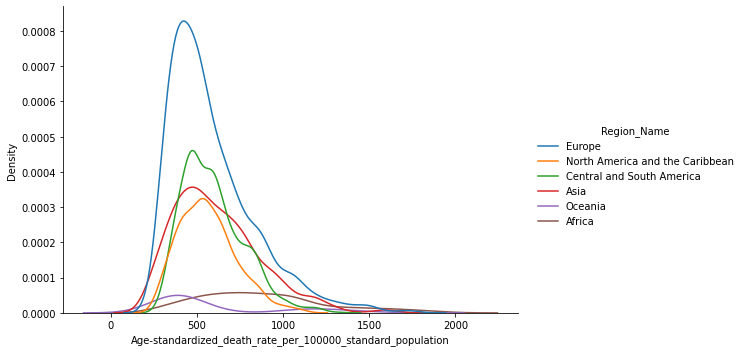

In [ ]:
# Graficamos con un diagrama de distribución o .displot para representar la variación en la distribución de datos
sns.displot(data=Mortalidad, x='Age-standardized_death_rate_per_100000_standard_population', hue='Region_Name', kind='kde', fill=False, height=5, aspect=1.5)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

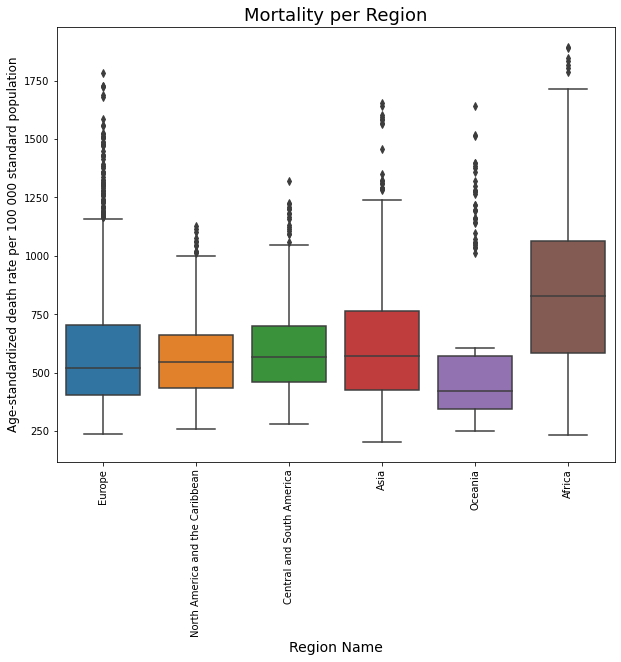

In [ ]:
# Graficamos con un diagrama de cajas o bigotes para representar los grupos de datos numéricos a través de sus cuartiles
plt.figure(figsize=(10, 8))
sns.boxplot(x="Region_Name", 
            y="Age-standardized_death_rate_per_100000_standard_population", 
            data=Mortalidad)
plt.ylabel("Age-standardized death rate per 100 000 standard population", size=12)
plt.xlabel("Region Name", size=14)
plt.title("Mortality per Region", size=18)
plt.xticks(rotation=90)

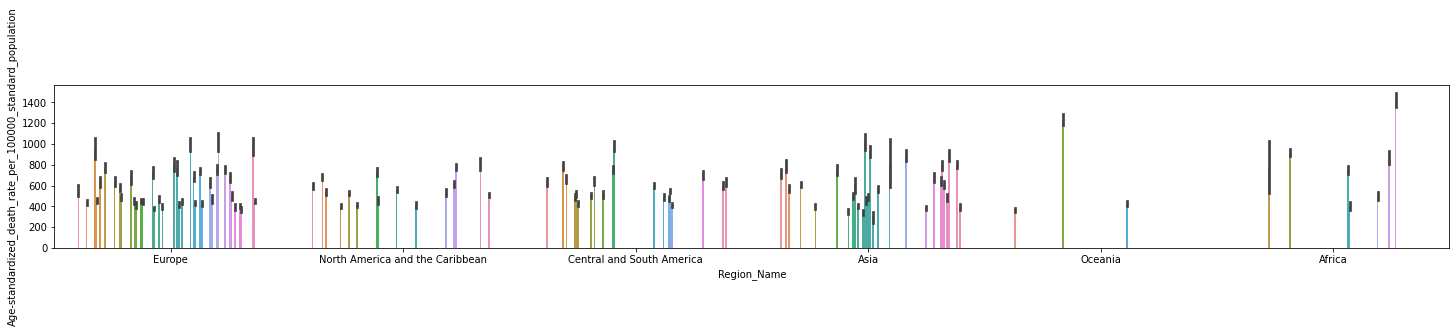

In [ ]:
# Graficamos con un grafico de barras para agregar los datos categóricos de acuerdo a las medidas de tendencia central
plt.figure(figsize=(25, 3))
sns.barplot(x="Region_Name",
           y="Age-standardized_death_rate_per_100000_standard_population",
           hue="Country_Name",
           data=Mortalidad).legend_.remove()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


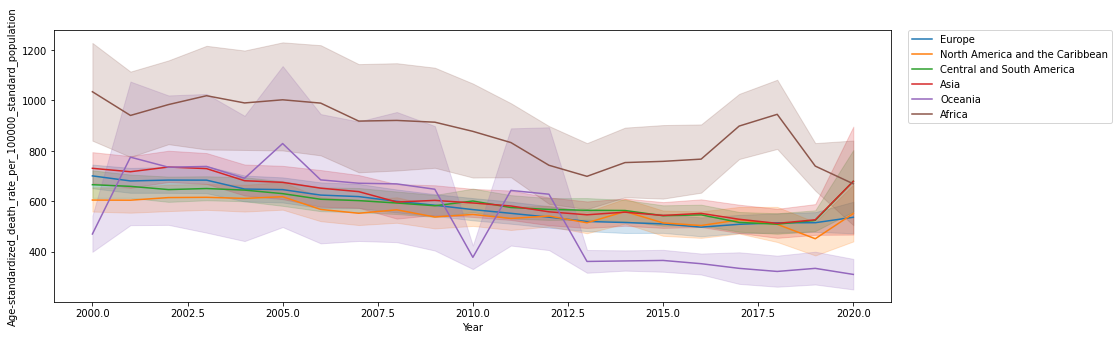

In [ ]:
# Llamamos .figure para delimitar nuestro campo de trabajo  
# y luego .lineplot para graficar un gráfico de lineas donde se puedan visualizar correctamente las relaciones estadísticas 
plt.figure(figsize=(15, 5))
sns.lineplot('Year', 'Age-standardized_death_rate_per_100000_standard_population', hue='Region_Name', 
             data=Mortalidad).legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
DF2 = Mortalidad[Mortalidad.Age_Group!="[All]"]
DF2

,Region_Name,Country_Name,Year,Sex,Age_Group,Number_of_deaths,Age-standardized_death_rate_per_100000_standard_population,Death_rate_per_100000population
694,Europe,Albania,2000,All,[0],582.0,NaN,1030.088496
695,Europe,Albania,2000,All,[1-4],343.0,NaN,131.367292
696,Europe,Albania,2000,All,[5-9],169.0,NaN,46.441330
697,Europe,Albania,2000,All,[10-14],118.0,NaN,35.150432
698,Europe,Albania,2000,All,[15-19],182.0,NaN,66.911765
...,...,...,...,...,...,...,...,...
300253,North America and the Caribbean,United States of America,2020,Female,[70-74],158856.0,NaN,2060.564427
300254,North America and the Caribbean,United States of America,2020,Female,[75-79],182440.0,NaN,3378.050596
300255,North America and the Caribbean,United States of America,2020,Female,[80-84],210786.0,NaN,5766.145390
300256,North America and the Caribbean,United States of America,2020,Female,[85+],617885.0,NaN,14557.669585


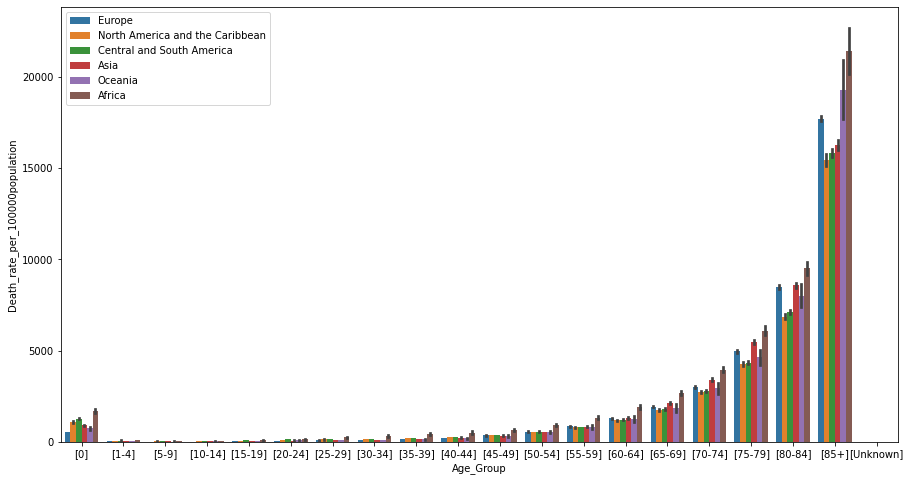

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Age_Group",
           y='Death_rate_per_100000population',
           hue="Region_Name",
           data=DF2).legend(loc='upper left')


In [ ]:
#generate_df = electricity_df[electricity_df["Description"] == "ENG Nuclear Electric Power"]
pivoted_df = pd.pivot_table(data=Mortalidad, index="Region_Name", columns="Year", values="Age-standardized_death_rate_per_100000_standard_population")
pivoted_df.head(10)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Region_Name,,,,,,,,,,,,,,,,,,,,,
Africa,1034.707726,940.607121,983.737568,1018.901711,990.241896,1002.728561,989.571892,918.182375,920.831881,913.847183,...,832.953846,742.851359,698.907315,753.530983,758.364579,767.179703,898.449765,945.039744,739.499624,669.172448
Asia,730.711778,717.124950,735.831414,729.489124,681.460200,674.963065,651.886153,638.146389,597.008480,603.404063,...,581.220068,558.047870,546.181917,556.659715,543.563242,551.835486,528.452326,512.157445,526.343267,679.126753
Central and South America,665.706308,659.106447,646.271567,650.486217,644.182438,630.214601,607.868931,602.509915,592.980029,582.156381,...,575.115032,567.478300,564.148910,563.222451,542.524365,545.990144,516.022438,509.031604,523.943162,679.543472
Europe,700.681179,680.596078,684.054320,683.772252,648.454940,646.181579,624.444439,618.460868,599.569741,584.085322,...,552.032337,536.810994,519.743132,515.572996,510.006716,497.222010,508.449721,514.382212,514.811553,536.303483
North America and the Caribbean,604.756525,604.222697,614.554708,615.582563,611.301429,617.993471,567.486899,552.324508,565.964802,537.477730,...,531.611584,541.328877,514.471160,559.393324,514.008933,503.628293,526.206514,508.463705,451.164212,551.188413
Oceania,469.950873,774.979791,735.051838,738.169016,691.301052,829.074060,684.822500,671.442501,668.850479,647.644006,...,642.865028,627.964263,361.001124,363.009699,365.008744,352.047735,333.554696,321.327986,333.551498,309.502921


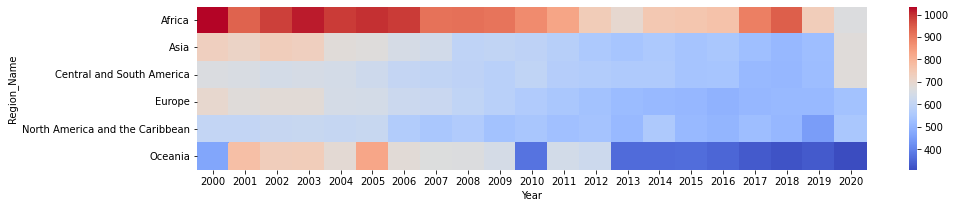

In [ ]:
plt.figure(figsize=(15, 3)) # We can set the size using matplotlib
sns.heatmap(pivoted_df, cmap="coolwarm") # cmap defines the color palette

In [ ]:
#generate_df = electricity_df[electricity_df["Description"] == "ENG Nuclear Electric Power"] 
pivoted_df_2 = pd.pivot_table(data=DF2, index="Age_Group", columns="Year", values="Death_rate_per_100000population")
pivoted_df_2.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Age_Group,,,,,,,,,,,,,,,,,,,,,
[0],1082.749205,1073.152243,1066.971189,1021.943719,1008.773049,1009.423413,957.893523,927.328025,892.885448,887.925615,...,871.784551,835.730524,807.774625,809.020348,800.924754,814.830011,681.489334,656.386185,674.579943,525.605172
[1-4],77.030163,76.831432,71.749178,68.604035,65.296240,62.070344,55.970096,51.584710,53.656686,50.685903,...,44.741263,43.046617,42.007183,41.070190,40.041221,39.285661,36.442229,35.307046,34.104206,23.149275
[10-14],27.415668,27.876780,29.164417,26.483348,26.605656,26.265777,24.993849,26.542408,23.540052,25.133006,...,22.780700,23.240851,21.785812,21.175410,20.936581,20.153532,19.610167,19.024808,17.633897,15.616766
[15-19],67.121120,67.126418,64.471260,63.404825,61.859449,62.631228,61.873662,59.910841,60.851417,59.227073,...,57.072838,55.081504,53.181875,51.854810,51.590081,51.852229,47.601825,47.167014,44.652545,39.515670
[20-24],109.800597,105.533711,105.815768,102.854858,99.035519,103.295335,99.457406,96.677622,94.567865,93.785232,...,86.606679,81.052065,77.989485,79.956921,76.631265,75.671159,69.415145,67.348024,65.613895,61.767139


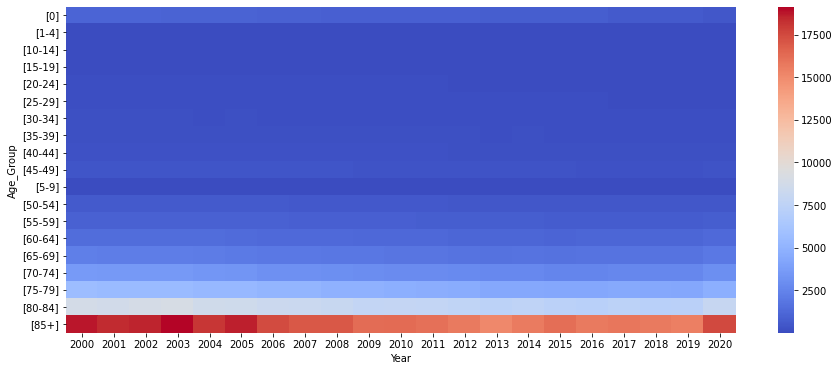

In [ ]:
plt.figure(figsize=(15, 6)) # We can set the size using matplotlib
sns.heatmap(pivoted_df_2, cmap="coolwarm") # cmap defines the color palette